<a href="https://colab.research.google.com/github/kwon-Hyeon-wook/-/blob/main/welfare_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
pip install pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [132]:
raw_welfare = pd.read_spss("/content/gdrive/My Drive/Colab Notebooks/Koweps_hpwc14_2019_beta2.sav")

In [133]:
welfare = raw_welfare.copy()

In [134]:
welfare.head()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN


In [135]:
welfare.shape

(14418, 830)

In [136]:
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [137]:
# 830개의 속성이 우리가 이해하기 쉬운 글자로 되어 있지 않다. 수집하는 사람이 특정 규칙에 따라서 번호를 메겨놨다.

In [138]:
# h14_g3은 성별, 
# h14_g4는 출생년도
# h14_g10은 혼인상태
# h14_g11은 종교
# p1402_8aq1은 월급
# h14_eco9는 직업코드
# h14_reg7는 지역코드

In [139]:
welfare['h14_g3']

0        2.0
1        1.0
2        1.0
3        1.0
4        2.0
        ... 
14413    2.0
14414    2.0
14415    1.0
14416    2.0
14417    1.0
Name: h14_g3, Length: 14418, dtype: float64

In [140]:
welfare['h14_g3'].isna().sum()

0

In [141]:
welfare['h14_g3'].value_counts()

2.0    7913
1.0    6505
Name: h14_g3, dtype: int64

In [142]:
welfare['p1402_8aq1']

0          NaN
1          NaN
2        107.0
3        192.0
4          NaN
         ...  
14413      NaN
14414      NaN
14415      NaN
14416    200.0
14417      NaN
Name: p1402_8aq1, Length: 14418, dtype: float64

In [143]:
welfare['p1402_8aq1'].isna().sum()

9884

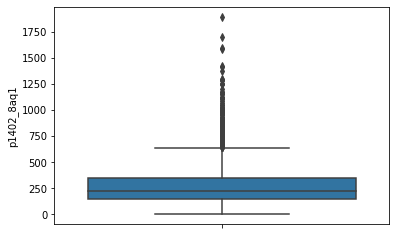

In [144]:
sns.boxplot(data=welfare,y='p1402_8aq1')

In [145]:
welfare.describe()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


In [146]:
# 우리가 분석하려는 속성에 대해서 의미 있는 이름으로 변경하자
welfare = welfare.rename(columns={
      'h14_g3': 'sex', 
      'h14_g4' : 'birth',
      'h14_g10': 'marriage_type',
      'h14_g11' : 'religion',
      'p1402_8aq1' : 'income',
      'h14_eco9' : 'code_job',
      'h14_reg7' : 'code_region'
})

In [147]:
welfare['sex'].dtypes

dtype('float64')

In [148]:
welfare['sex'].value_counts()

2.0    7913
1.0    6505
Name: sex, dtype: int64

In [149]:
# 이상치와 결측치가 있다면 제거하거나 다른 값으로 대체하는 작업을 수행하는데 지금은 이상, 결측치가 없어서 생략하자

In [150]:
# plt.rcParams.update({'font.family':'Malgun Gothic'})

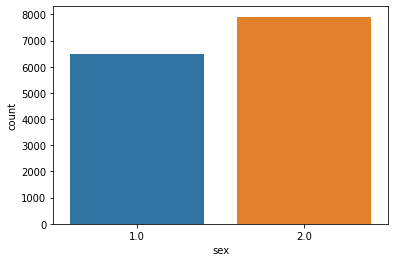

In [151]:
sns.countplot(data=welfare,x='sex')

In [152]:
welfare['sex'] = np.where(welfare['sex']==1,'남자','여자')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text

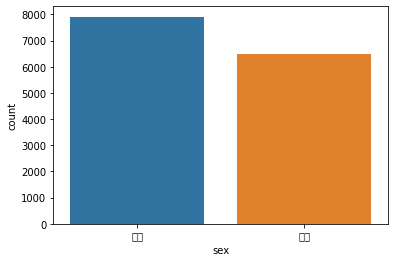

In [153]:
sns.countplot(data=welfare,x='sex')

In [154]:
# 1 - 2019년 기준 나이

In [155]:
welfare=welfare.assign(age=lambda x:2019-x['birth']+1)

In [156]:
welfare[['age','birth']]

,age,birth
0,75.0,1945.0
1,72.0,1948.0
2,78.0,1942.0
3,58.0,1962.0
4,57.0,1963.0
...,...,...
14413,53.0,1967.0
14414,28.0,1992.0
14415,25.0,1995.0
14416,22.0,1998.0


In [157]:
# 2 나이에 따른 월급

In [158]:
welfare[['age','income']].head()

,age,income
0,75.0,NaN
1,72.0,NaN
2,78.0,107.0
3,58.0,192.0
4,57.0,NaN


In [159]:
welfare.query('age==41')[['age','income']]

,age,income
111,41.0,264.0
221,41.0,NaN
224,41.0,750.0
241,41.0,172.0
290,41.0,300.0
...,...,...
13719,41.0,NaN
13739,41.0,NaN
13895,41.0,NaN
13984,41.0,332.0


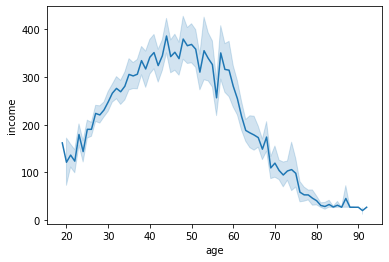

In [160]:
sns.lineplot(data=welfare,x='age',y='income')

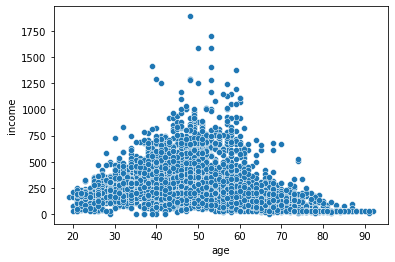

In [161]:
sns.scatterplot(data=welfare,x='age',y='income')

In [ ]:
sns.barplot(data=welfare,x=)

In [162]:
# 3

In [163]:
region = pd.DataFrame({
    'code_region' : [1,2,3,4,5,6,7],
    'region':['SL','ICN/GG','BSN/GN/US','TK/KB','TJ/CB','KW/CB','GJ/JN/JB/JJ']
})

In [164]:
welfare=pd.merge(welfare,region)

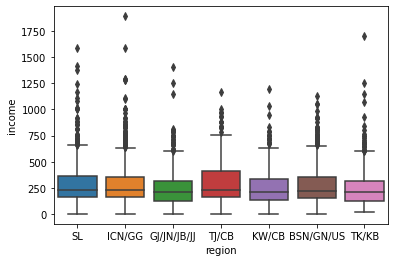

In [165]:
sns.boxplot(data=welfare,x='region',y='income')

In [121]:
# 4

In [167]:
d=welfare.query('sex == "남자"').sort_values('income',ascending=False).head(5)

In [170]:
d=d[['income','code_job']]

In [169]:
job = pd.DataFrame({
    'code_job':[235,132,241,221,312],
    'job':['machine_tester','insur/fina_mgr','medical_expe','com/hdw','fina']
})

In [171]:
d=pd.merge(d,job)

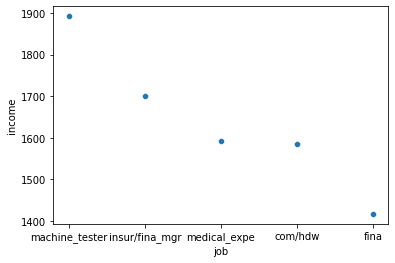

In [172]:
sns.scatterplot(data=d,x='job',y='income')

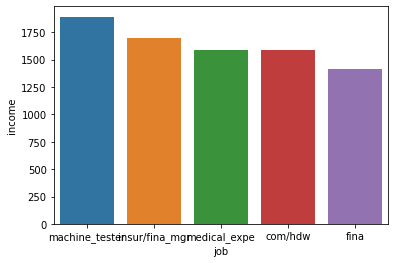

In [173]:
sns.barplot(data=d,x='job',y='income')